<a href="https://colab.research.google.com/github/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <center> **Credit Card Fraud (Anomaly/Outlier) Detection** 
<center><em>The processes of determining an entry among entries that does not seem to belong. In this case we are using the Anonymized Credit Card dataset from Kaggle, which has  transactions labeled as fraudulent or genuine to create an ML Fraud Detection model.</em></center>
<br>
<center><img src="https://github.com/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Assets/CCFD.png?raw=1" width=600/></center>

***Project Contributors:*** Kuzi Rusere<br>
**MBA streamlit App URL:** N/A

Anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events, or observations that deviate significantly from the majority of the data and do not conform to a well-defined notion of normal behavior.  **Supervised anomaly detection** techniques require a data set that has been labeled as "normal" and "abnormal" and involves training a classifier. **Unsupervised anomaly detection** techniques assume the data is unlabelled and are by far the most commonly used due to their wider and relevant application. **Semi-supervised anomaly detection** techniques assume that some portion of the data is labeled. 

* An anomaly or outlier is a point or collection of points that are relatively distant from other points in a multi-dimensional space of features, an observation (or subset of observations) that appears to be inconsistent with the remainder of that set of data.

There are multiple methods/approaches to undertaking anomaly (or outlier) detection and these are sort-of classified into 3:
* Simple **Statistical** methods, such as the $Z$ test where you look at the how many standards deviation the data point is from the sample mean. The higher the number of $σ$ the more anomalous the data point is. Other simple statistical methods are using the Interquartile Range on box plot or the Histogram bins. In this project we are not going to be using these methods as they are not applicable to multivariate data and not 'normally' distributed. 

* (General/Classical) **Machine Learning**, are the methodologies that we are going to focus in this project. The methods depending on the data can either be supervised, semi-supervised or unsupervised. Logistic Regression, K Nearest Neighbors, Support Vector Classifier, DecisionTree Classifier, LOF (Local outlier factor), Isolations Forest, DBSCAN, etc., are some examples of Machine Learning algorithms/methods used in anomaly/outlier


* **Deep Learning**, these are methods that are implemented on artificial neural networks for anomaly detection. A common example of this is the **Autoencoder** 




#### **Project Outline**:
1. [Data Collection](#scrollTo=Data_Collection)
2. [Exploratory Data Analytics](#scrollTo=Exploratory_Data_Analytics)
3. [Data Cleaning and Preperation](#scrollTo=Data_Cleaning_and_Preperation)
4. [Modeling, Evaluation and Discussion](#scrollTo=Modeling_Evaluation_and_Discussion)
5. [Conclusion](#scrollTo=Conclusion)
6. [References](#scrollTo=References)




In [ ]:
# #we read the data from the AWS RDS
# from sqlalchemy import create_engine
# import mysql.connector as connection
# import config


# host= config.host
# user= config.user
# db_password = config.password
# port = config.port
# database = config.database


# engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

# try:
#     query = f"SELECT * FROM NHANES_Data"
#     dataframe = pd.read_sql(query,engine)

# except Exception as e:
#     print(str(e))

### **Data Collection**

The data was collected from Kaggle the link is [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* **Time**: The time (in seconds) elapsed between the transaction and the very first transaction
* **V1 to V28**: Obtained from principle component analysis (PCA) transformation on original features that are not available due to confidentiality
* **Amount**: The amount of the transaction
* **Class**: The class of the transaction either it is fraudulent or not (Class = 0: Normal Transaction, Class = 1: Fraudulent Transaction)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **Exploratory Data Analytics**

In [ ]:
import plotly.express as px

In [ ]:
#lets take a look at the classes:
# Class 0: Normal Transaction, Class 1: Fraudulent Transaction
class_count_dict = dict(df['Class'].value_counts())
class_count_dict

{0: 284315, 1: 492}

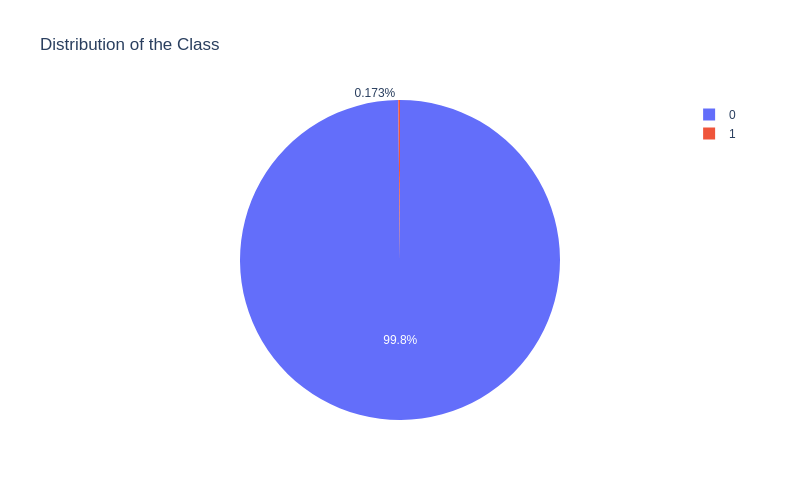

In [ ]:
temp_df = pd.DataFrame(df['Class'].value_counts()).reset_index()
temp_df.columns = [temp_df.columns[1], 'Count']

fig = px.pie(temp_df, values='Count', names='Class', title='Distribution of the Class')
fig.show(renderer='png', height=500, width=800)
#fig.show(height=500, width=800)

### **Data Cleaning and Preperation**

Balaning the data:

Since the data is not Balanced, there are several ways of working with an imbalanced dataset such as:
1. [ReSampling](#scrollTo=ReSampling)
2. [Generate Synthetic Sample](#scrollTo=Generate_Synthetic_Sample)
3. Changing the algorithms (which we are going to be doing)
4. Looking at different Pefomance metrics when evaluating the model (we will discuss this on the models created using the imbalanced dataset)




##### **ReSampling**

1. [Oversample Minority Class](#scrollTo=Oversample_Minority_Class)
2. [Undersample Majority Class](#scrollTo=Undersample_Majority_Class)

In [ ]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==0)] 
df_minority = df[(df['Class']==1)] 

###### **Oversample Minority Class**

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= class_count_dict[0], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_UP_resample = pd.concat([df_minority_upsampled, df_majority])

###### **Undersample Majority Class**

In [ ]:
# undersample majority class
df_majority_undersampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= class_count_dict[1], # to match minority class
                                 random_state=42)  # reproducible results
# Combine minority class with undersampled majority class
df_UNDER_resample = pd.concat([df_majority_undersampled, df_majority])

##### **Generate Synthetic Sample**

### **Modeling, Evaluation and Discussion**
1. [Logistic Regression](#scrollTo=Logistic_Regression)
2. [K Nearest Neighbors](#scrollTo=K_Nearest_Neighbors)
3. [Support Vector Machine Classifier](#scrollTo=Support_Vector_Machine_Classifier)
4. [DecisionTree Classifier](#scrollTo=DecisionTree_Classifier)
5. [Local Outlier Factor](#scrollTo=Local_Outlier_Factor)
6. [Isolations Forest](#scrollTo=Isolations_Forest)
7. [DBSCAN](#scrollTo=DBSCAN)
8. [AutoEncoder](#scrollTo=AutoEncoder)


For this project, we will start with Upsampling minority class so that it matches the majority class. we will run the resample data on Logistic Regression, K Nearest Neighbors, Support Vector Classifier, DecisionTree Classifier, LOF (Local outlier factor), and Isolations Forest Machine Learning algorithms.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
df_resample.shape

(568630, 31)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#we will scale the feature data 
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

First we are going to run our ML algorithms without any hyperparameter tuning and no cross validation 

##### **Logistic Regression**

Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



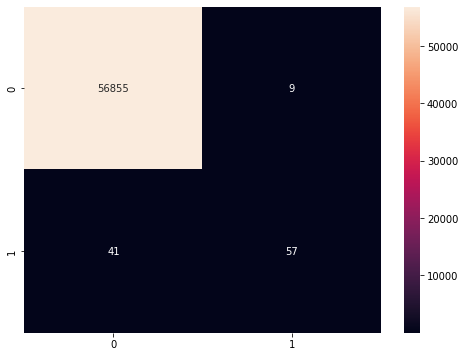

In [ ]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,cbar = True, fmt = 'g')

##### **K Nearest Neighbors**

KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



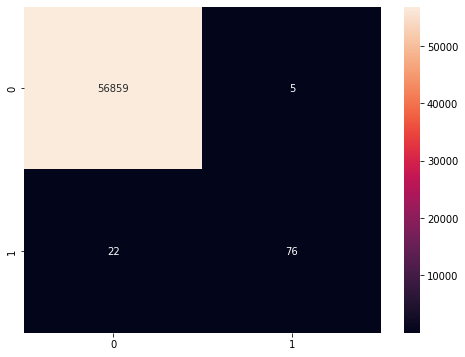

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,cbar = True, fmt = 'g')

##### **Support Vector Machine Classifier**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.61      0.75        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



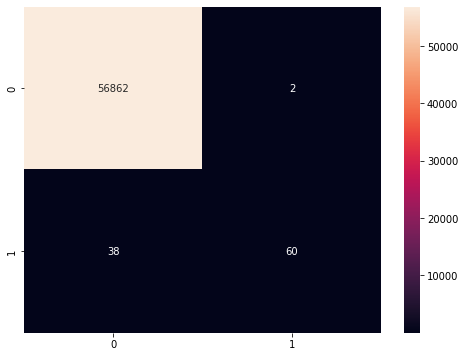

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,cbar = True, fmt = 'g')

##### **DecisionTree Classifier**

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. Creates the classification model by building a decision tree,with each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.80      0.73        98

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



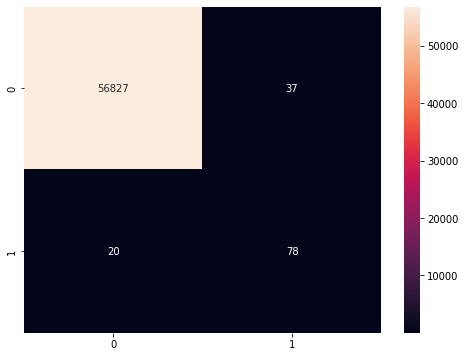

In [ ]:
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True,cbar = True, fmt = 'g')

##### **Local Outlier Factor**

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

##### **Isolations Forest**

Isolation forest is an anomaly detection algorithm. It detects anomalies using isolation, rather than modelling the normal points.  It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature.

##### **DBSCAN**

##### **AutoEncoder**

### **Conclusion**

### **References**
> https://en.wikipedia.org/wiki/Autoencoder \
> https://towardsdatascience.com/statistical-techniques-for-anomaly-detection-6ac89e32d17a \
> https://en.wikipedia.org/wiki/Anomaly_detection
